# ME:4111 Scientific Computing and Machine Learning 
# Lecture 27: Kernel SVM - Rbf
# by Prof. Shaoping Xiao

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Read dataset

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
X = fruits[['height', 'width']].as_matrix()
y_ = fruits['fruit_label'].as_matrix()
# make into a binary problem: Apple vs non-Apple (True vs False, or 1 vs 0)
y = y_ == 1

### training/test split (test size is 25%)

In [3]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train, y_test = train_test_split(X,y, random_state = 4)

### Standardization and plot the training data

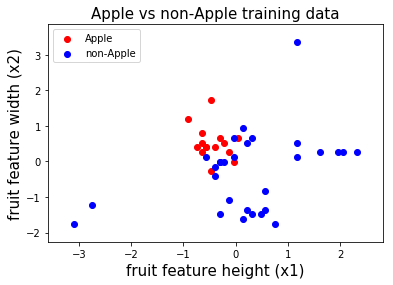

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_)
X_test = scaler.transform(X_test_)

x1_min, x1_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
x2_min, x2_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], marker = 'o', c='r', label='Apple')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], marker = 'o', c='b', label='non-Apple')
plt.xlabel('fruit feature height (x1)', size=15)
plt.ylabel('fruit feature width (x2)', size=15)
plt.title('Apple vs non-Apple training data', size= 15)
plt.legend()
plt.show()

### rbf kernel SVC training

In [5]:
from sklearn.svm import SVC
gamma_svc = 0.1
clf = SVC(kernel='rbf', random_state=0, gamma=gamma_svc, C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Plot the decision region vs training data

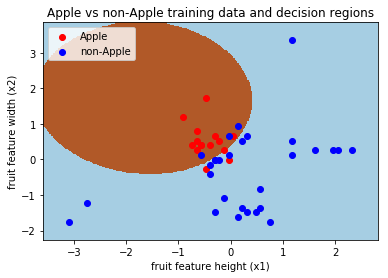

In [6]:
plt.figure()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], marker = 'o', c='r', label='Apple')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], marker = 'o', c='b', label='non-Apple')

plt.title('Apple vs non-Apple training data and decision regions')
plt.xlabel('fruit feature height (x1)')
plt.ylabel('fruit feature width (x2)')
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

### Plot the decision region vs test data

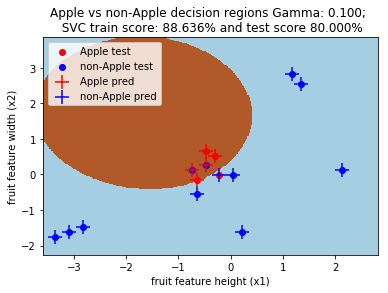

In [7]:
plt.figure()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker = 'o', c='r', label='Apple test')
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1], marker = 'o', c='b', label='non-Apple test')
plt.scatter(X_test[y_pred==1,0],X_test[y_pred==1,1], marker = '+', c='r', s=200, label='Apple pred')
plt.scatter(X_test[y_pred==0,0],X_test[y_pred==0,1], marker = '+', c='b', s=200, label='non-Apple pred')
plt.title('Apple vs non-Apple decision regions Gamma: {:.3f}; \n SVC train score: {:.3f}% and test score {:.3f}%'
          .format(gamma_svc, clf.score(X_train, y_train)*100, clf.score(X_test, y_test)*100))
plt.xlabel('fruit feature height (x1)')
plt.ylabel('fruit feature width (x2)')
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

### confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix
print('confusion matrix \n', confusion_matrix(y_test, y_pred))

confusion matrix 
 [[9 2]
 [1 3]]
